In [2]:
%matplotlib inline
import numpy as np # 1.19.4
import matplotlib.pyplot as plt # 3.3.3
import pandas as pd # 1.1.5


In [3]:
data = pd.read_csv('happy_sad_data.csv')
data = data.drop('instrumentalness', axis=1)
data.head()


,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,Marry You,Doo-Wops & Hooligans,Bruno Mars,6SKwQghsR8AISlxhcwyA9R,2010-10-05,76,230192,0.621,0.332,0.820,0.104,0.452,-4.865,0.0367,144.905,10,4,happy
1,Sunroof,Sunroof,Nicky Youre,4h4QlmocP3IuwYEj2j14p8,2021-12-03,89,163025,0.768,0.352,0.714,0.150,0.842,-5.110,0.0401,131.443,10,4,happy
2,Shape of You,Shape of You,Navagio,2796m8y7tOCTUsTQfjmeI4,2022-01-20,55,157647,0.810,0.303,0.636,0.131,0.687,-6.072,0.0487,101.966,1,4,happy
3,If I Can't Have You,Shawn Mendes (Deluxe),Shawn Mendes,2bT1PH7Cw3J9p3t7nlXCdh,2019-06-19,73,191466,0.691,0.487,0.823,0.134,0.870,-4.197,0.0623,123.935,2,4,happy
4,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),Jawsh 685,1xQ6trAsedVPCdbtDAmk0c,2020-06-11,79,171374,0.767,0.234,0.481,0.269,0.761,-8.520,0.0803,150.076,0,4,happy


In [4]:
from sklearn.model_selection import train_test_split # 0.23.2


In [5]:
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)
print('Broj primjera za treniranje: ' + str(len(train_set)))
print('Broj primjera za testiranje: ' + str(len(test_set)))


Broj primjera za treniranje: 1605
Broj primjera za testiranje: 402


In [6]:
columns = ["popularity", "length", "danceability", "acousticness", "energy", "liveness", "valence", "loudness", "speechiness", "tempo", "key", "time_signature"]
happy_data = data.loc[data["mood"] == "happy", :][columns].astype(float)
sad_data = data.loc[data["mood"] == "sad", :][columns].astype(float)
histogram_data = data[columns].astype(float)

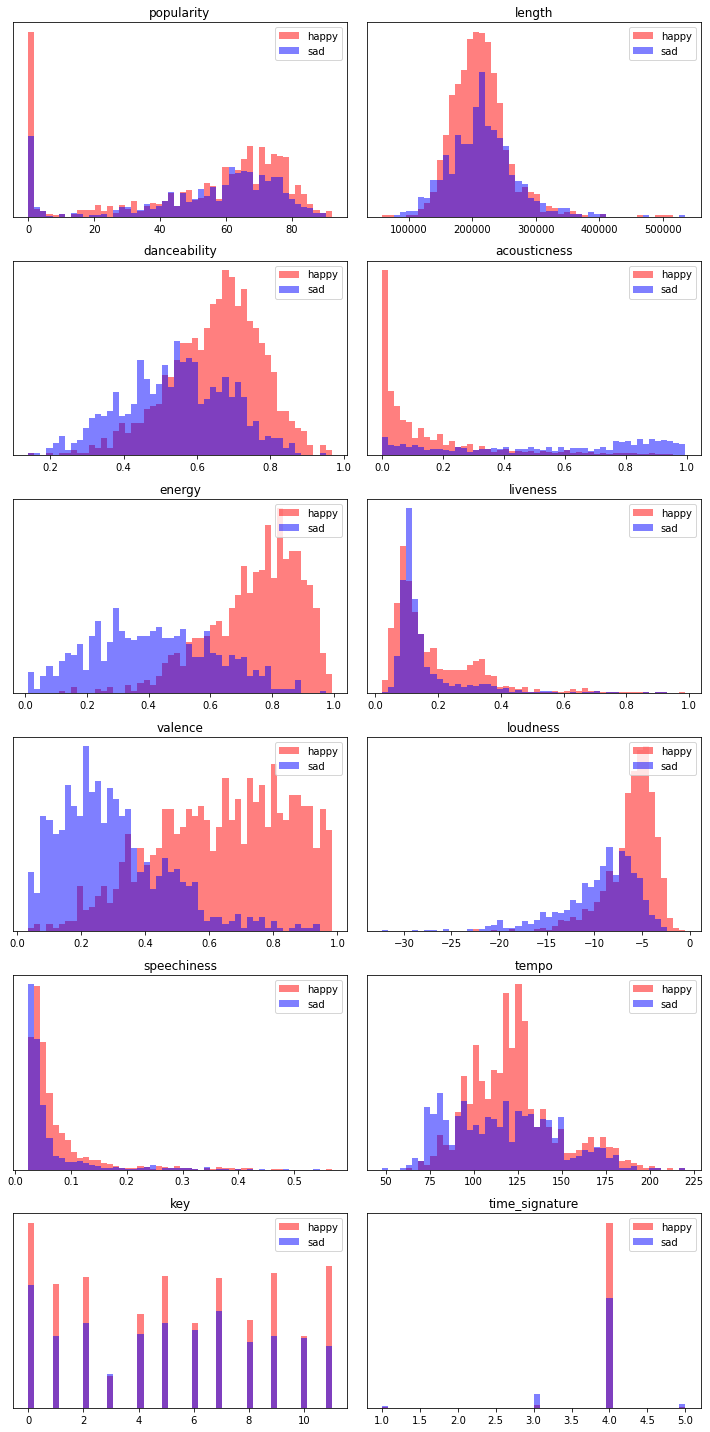

In [7]:
fig, axes = plt.subplots(6, 2, figsize=(10, 20))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
for i in range(12):
    _, bins = np.histogram(histogram_data.iloc[:,i], bins=50)
    ax[i].hist(happy_data.iloc[:,i], bins=bins, color='r', alpha=.5, label='happy')
    ax[i].hist(sad_data.iloc[:,i], bins=bins, color='b', alpha=.5, label='sad')
    ax[i].set_title(histogram_data.columns.values[i])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()

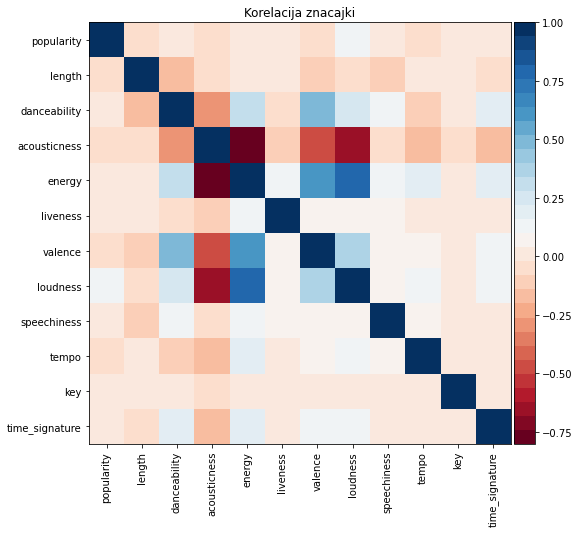

In [8]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

X_corr = histogram_data.corr()
cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(X_corr, interpolation="nearest", cmap=cmap)
ax.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(X_corr.shape[1]))
ax.set_xticklabels(histogram_data.columns.values, rotation=90)
ax.set_yticks(range(X_corr.shape[1]))
ax.set_yticklabels(histogram_data.columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)

plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [10]:
data = pd.read_csv('happy_sad_data.csv',index_col=0)
data = data.drop('instrumentalness', axis = 1)
col_features = data.columns[5:-3]
col_features


Index(['length', 'danceability', 'acousticness', 'energy', 'liveness',
       'valence', 'loudness', 'speechiness', 'tempo'],
      dtype='object')

In [11]:
data = data[col_features]
data

,length,danceability,acousticness,energy,liveness,valence,loudness,speechiness,tempo
name,,,,,,,,,
Marry You,230192,0.621,0.33200,0.820,0.1040,0.452,-4.865,0.0367,144.905
Sunroof,163025,0.768,0.35200,0.714,0.1500,0.842,-5.110,0.0401,131.443
Shape of You,157647,0.810,0.30300,0.636,0.1310,0.687,-6.072,0.0487,101.966
If I Can't Have You,191466,0.691,0.48700,0.823,0.1340,0.870,-4.197,0.0623,123.935
Savage Love (Laxed - Siren Beat),171374,0.767,0.23400,0.481,0.2690,0.761,-8.520,0.0803,150.076
...,...,...,...,...,...,...,...,...,...
I Found,273000,0.567,0.86200,0.303,0.1040,0.252,-12.481,0.0351,124.949
Alien Blues,155933,0.467,0.08070,0.757,0.0876,0.433,-5.093,0.0330,82.282
Telephones,212432,0.526,0.00283,0.447,0.1090,0.183,-9.268,0.0274,74.995


In [12]:


scaler = MinMaxScaler()
X = data #.drop('name', axis=1)
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA() # use option n_components=2 to calculate just first two principal components
pca.fit(X_scaled) # fit PCA model to breast cancer data
X_pca = pca.transform(X_scaled) # transform data onto the principal components
print("Dimenzije originalnih podataka: %s" % str(X_scaled.shape))
print("Dimenzije projiciranih podataka: %s" % str(X_pca.shape))


Dimenzije originalnih podataka: (2007, 9)
Dimenzije projiciranih podataka: (2007, 9)


In [13]:
data_pca = pd.DataFrame(X_pca, columns=['PC'+str(i) for i in range(1,X_pca.shape[1]+1)])
data_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.083786,-0.083804,0.117232,-0.064649,-0.035273,0.124168,-0.182057,0.051194,0.045716
1,-0.239035,0.341662,0.090808,-0.034799,0.009937,0.029807,-0.115872,-0.071441,-0.020470
2,-0.148592,0.263185,-0.136139,-0.060010,0.031382,0.024644,-0.074274,-0.088375,-0.011306
3,-0.202396,0.370849,0.146938,0.057857,-0.085379,0.173038,-0.120689,-0.002923,-0.009628
4,-0.154747,0.246691,0.112944,-0.068286,0.201611,-0.181555,0.030383,-0.061563,-0.048306


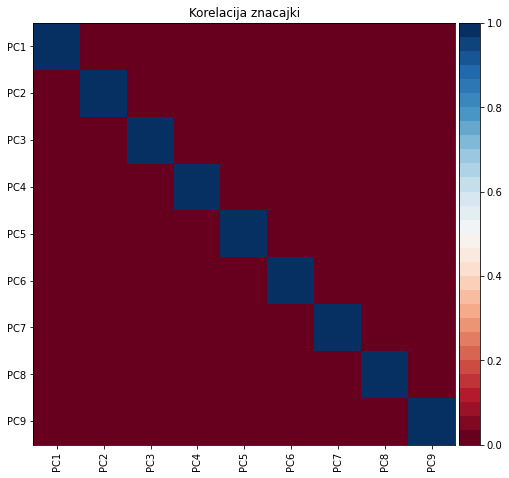

In [14]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

X_corr = data_pca.corr()
cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(X_corr, interpolation="nearest", cmap=cmap)
plt.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(X_corr.shape[1]))
ax.set_xticklabels(data_pca.columns.values, rotation=90)
ax.set_yticks(range(X_corr.shape[1]))
ax.set_yticklabels(data_pca.columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)

plt.show();


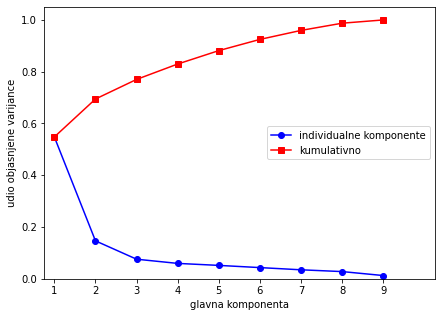

In [15]:
plt.figure(figsize=(7,5))

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cummulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,X_pca.shape[1]+1), explained_variance_ratio, '-o', label='individualne komponente', c='b')
plt.plot(range(1,X_pca.shape[1]+1), explained_variance_ratio_cummulative, '-s', label='kumulativno', c='r')

plt.ylabel('udio objasnjene varijance')
plt.xlabel('glavna komponenta')
plt.xlim(0.75,X_pca.shape[1]+1.25)
plt.ylim(0,1.05)
plt.xticks(range(1,X_pca.shape[1]+1))
plt.legend(loc='center right')
plt.show()


In [16]:
data.reset_index()

,name,length,danceability,acousticness,energy,liveness,valence,loudness,speechiness,tempo
0,Marry You,230192,0.621,0.33200,0.820,0.1040,0.452,-4.865,0.0367,144.905
1,Sunroof,163025,0.768,0.35200,0.714,0.1500,0.842,-5.110,0.0401,131.443
2,Shape of You,157647,0.810,0.30300,0.636,0.1310,0.687,-6.072,0.0487,101.966
3,If I Can't Have You,191466,0.691,0.48700,0.823,0.1340,0.870,-4.197,0.0623,123.935
4,Savage Love (Laxed - Siren Beat),171374,0.767,0.23400,0.481,0.2690,0.761,-8.520,0.0803,150.076
...,...,...,...,...,...,...,...,...,...,...
2002,I Found,273000,0.567,0.86200,0.303,0.1040,0.252,-12.481,0.0351,124.949
2003,Alien Blues,155933,0.467,0.08070,0.757,0.0876,0.433,-5.093,0.0330,82.282
2004,Telephones,212432,0.526,0.00283,0.447,0.1090,0.183,-9.268,0.0274,74.995
2005,Good Grief,206493,0.730,0.14700,0.758,0.3110,0.877,-4.888,0.0653,120.041


In [17]:
data = pd.read_csv('happy_sad_data.csv')
data = data.drop('instrumentalness', axis = 1)
data["mood"]
data.reset_index()

,index,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,0,Marry You,Doo-Wops & Hooligans,Bruno Mars,6SKwQghsR8AISlxhcwyA9R,2010-10-05,76,230192,0.621,0.33200,0.820,0.1040,0.452,-4.865,0.0367,144.905,10,4,happy
1,1,Sunroof,Sunroof,Nicky Youre,4h4QlmocP3IuwYEj2j14p8,2021-12-03,89,163025,0.768,0.35200,0.714,0.1500,0.842,-5.110,0.0401,131.443,10,4,happy
2,2,Shape of You,Shape of You,Navagio,2796m8y7tOCTUsTQfjmeI4,2022-01-20,55,157647,0.810,0.30300,0.636,0.1310,0.687,-6.072,0.0487,101.966,1,4,happy
3,3,If I Can't Have You,Shawn Mendes (Deluxe),Shawn Mendes,2bT1PH7Cw3J9p3t7nlXCdh,2019-06-19,73,191466,0.691,0.48700,0.823,0.1340,0.870,-4.197,0.0623,123.935,2,4,happy
4,4,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),Jawsh 685,1xQ6trAsedVPCdbtDAmk0c,2020-06-11,79,171374,0.767,0.23400,0.481,0.2690,0.761,-8.520,0.0803,150.076,0,4,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2002,I Found,5AM (Expanded Edition),Amber Run,5zT5cMnMKoyruPj13TQXGx,2015-04-20,74,273000,0.567,0.86200,0.303,0.1040,0.252,-12.481,0.0351,124.949,7,4,sad
2003,2003,Alien Blues,Gawk,Vundabar,11iIikXxC6NP0Ma8vMD27x,2015-07-24,83,155933,0.467,0.08070,0.757,0.0876,0.433,-5.093,0.0330,82.282,3,4,sad
2004,2004,Telephones,Changes,Vacations,0JIMT9gzLIIz0esKLyjbKf,2018,78,212432,0.526,0.00283,0.447,0.1090,0.183,-9.268,0.0274,74.995,2,4,sad
2005,2005,Good Grief,Wild World,Bastille,6IGA5YrFiEr5ANrMqKkR6H,2016-09-09,69,206493,0.730,0.14700,0.758,0.3110,0.877,-4.888,0.0653,120.041,1,4,sad


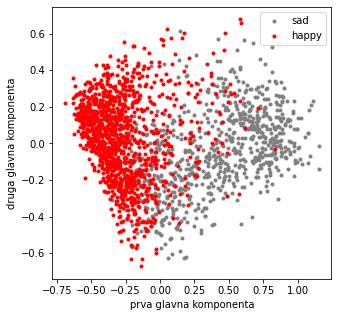

In [18]:
plt.figure(figsize=(5, 5))

plt.scatter(data_pca.loc[data.loc[:,'mood']=='sad','PC1'], 
            data_pca.loc[data.loc[:,'mood']=='sad','PC2'],
            color='gray', marker='.', label='sad')

plt.scatter(data_pca.loc[data.loc[:,'mood']=='happy','PC1'], 
            data_pca.loc[data.loc[:,'mood']=='happy','PC2'], 
            color='red', marker='.', label='happy')
plt.legend()
plt.xlabel("prva glavna komponenta")
plt.ylabel("druga glavna komponenta")
plt.show()


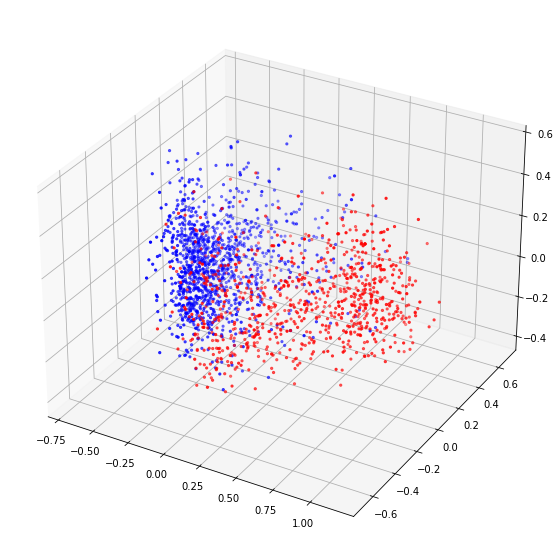

In [19]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_pca.loc[data.loc[:,'mood']=='sad','PC1'], 
            data_pca.loc[data.loc[:,'mood']=='sad','PC2'],
           data_pca.loc[data.loc[:,'mood']=='sad','PC3'],
            color='red', marker='.', label='sad')

ax.scatter(data_pca.loc[data.loc[:,'mood']=='happy','PC1'], 
            data_pca.loc[data.loc[:,'mood']=='happy','PC2'], 
           data_pca.loc[data.loc[:,'mood']=='happy','PC3'],
            color='blue', marker='.', label='happy')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [21]:
data = pd.read_csv('happy_sad_data.csv',index_col=0)

data_train, data_test = train_test_split(data, test_size=0.30, random_state=39)

X_train = data_train[col_features]
y_train = data_train['mood']

X_test = data_test[col_features]
y_test = data_test['mood']

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('pca', PCA()),
                       ('logistic',LogisticRegression(solver='liblinear'))])

components_to_evaluate = 10

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=range(1,components_to_evaluate)),
                         cv=10,
                         scoring='accuracy')

model = estimator.fit(X_train, y_train)


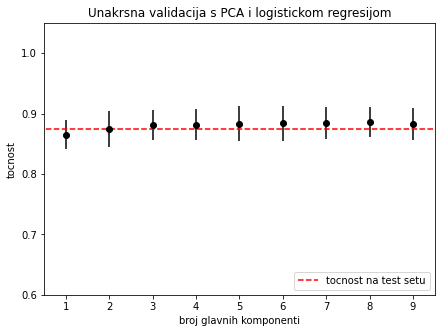

In [22]:
plt.figure(figsize=(7,5))

results_selected = zip(model.cv_results_['params'],model.cv_results_['mean_test_score'],model.cv_results_['std_test_score'])
for params, mean_scores, std_scores in results_selected:
    plt.errorbar(params['pca__n_components'], mean_scores, yerr=std_scores, fmt='ok')

plt.hlines(accuracy_score(y_test, model.predict(X_test)), 0, components_to_evaluate, 
           color='red', linestyle='--', 
           label='tocnost na test setu')

plt.ylabel('tocnost')
plt.xlabel('broj glavnih komponenti')
plt.title('Unakrsna validacija s PCA i logistickom regresijom')
plt.xlim(0.5,components_to_evaluate-0.5)
plt.ylim(0.6,1.05)
plt.xticks(range(1,components_to_evaluate))
plt.legend(loc='lower right')
plt.show()


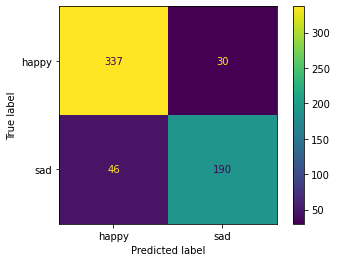

In [23]:
from sklearn import metrics

actual = y_test
predicted = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["happy", "sad"])

cm_display.plot()
plt.show()